# Imports

In [216]:
''' For Machine Learning ''' 
from keras.layers import Input, Dense,Flatten
from keras.models import Model, Sequential
from keras.datasets import mnist

''' For Data Manipulation '''
import numpy as np
from sklearn.model_selection import train_test_split

''' For Visualization '''
import matplotlib.pyplot as plt

''' Other '''
import itertools
from tqdm.notebook import tnrange 

# Crude Model with Crude Data

In [217]:
data = np.random.rand(1000000, 32) # Generate 1,000,000 random data points with 50 features each
train, test = train_test_split(data, test_size = 0.1, random_state = 42) # split training and testing data 

In [230]:
input_dim = len(data[0]) # input dimension is equal to the number of features
hidden_layer_nodes = 2 # the number of nodes to use in the hidden layer

''' Create the Autoencoder '''
input_layer = Input(shape=(input_dim,))
encoder_layer = Dense(hidden_layer_nodes, activation='sigmoid')(input_layer)
decoder_layer = Dense(input_dim, activation='sigmoid')(encoder_layer)
autoencoder = Model(input_layer, decoder_layer)

''' Create the Encoder '''
encoder = Model(input_layer, encoder_layer)

''' Create the Decoder '''
encoded_input = Input(shape=(hidden_layer_nodes,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [231]:
autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy') # compile the model

In [232]:
autoencoder.fit(train,
                train,
                epochs=10, # run through the training data 10 times
                batch_size=100, # use batches of 100 before making changes
                shuffle=True, # shuffle the training data to prevent biasing
                validation_data=(test, test), # use our test data set as validation
                verbose = 0) # hide the output while training

autoencoder.summary() # print out a summary of our trained model

Model: "model_97"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_70 (InputLayer)       [(None, 32)]              0         
                                                                 
 dense_110 (Dense)           (None, 2)                 66        
                                                                 
 dense_111 (Dense)           (None, 32)                96        
                                                                 
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


In [233]:
encoded_test = encoder.predict(test) # encode our features
decoded_test = decoder.predict(encoded_test) # decode our encoded features

print(test[0]) # look at the actual test value
print(decoded_test[0]) # look at the reconstructed test value

[0.07510069 0.30007593 0.76305144 0.07118664 0.13958508 0.3043231
 0.26176505 0.89179746 0.78112719 0.48390841 0.95331468 0.07744047
 0.06803597 0.18831651 0.11204832 0.55140946 0.28988208 0.05071692
 0.68582315 0.28177366 0.39607787 0.96742285 0.84322343 0.63715436
 0.86351372 0.25424301 0.0181759  0.36545146 0.53544177 0.67827945
 0.69267482 0.68433683]
[0.4975744  0.49975744 0.49880365 0.50790894 0.11648697 0.5070695
 0.50237584 0.51364744 0.4936175  0.4960701  0.49711403 0.5066658
 0.50228846 0.49448282 0.49697858 0.5063781  0.49736187 0.48692814
 0.49450308 0.49640855 0.49805    0.50026315 0.4800516  0.50509554
 0.5296125  0.51166415 0.49805677 0.5124451  0.4689298  0.50134176
 0.49138045 0.50440127]


In [234]:
error = np.sum(abs(test - decoded_test), axis = 1) # compute the absolute error across each feature 

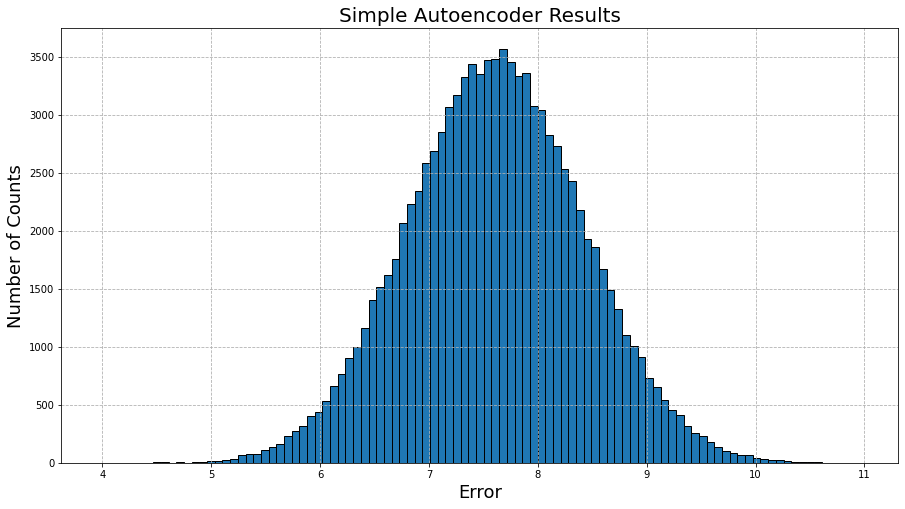

In [235]:
fig, ax = plt.subplots(figsize = (15,8))
bins = np.linspace(min(error), max(error), 100)
ax.hist(error, bins = bins, align = 'mid', edgecolor = 'black')
ax.set_title('Simple Autoencoder Results', fontsize = 20)
ax.set_xlabel('Error', fontsize = 18)
ax.set_ylabel('Number of Counts', fontsize = 18)
ax.grid(linestyle = '--')
plt.show()

# Complex Model with Crude Data

In [236]:
input_dim = len(data[0]) # input dimension is equal to the number of features
hidden_layer1_nodes = 16 # the number of nodes to use in the 1st hidden layer
hidden_layer2_nodes = 8 # the number of nodes to use in the 2nd hidden layer
hidden_layer3_nodes = 4 # the number of nodes to use in the 3rd hidden layer
hidden_layer4_nodes = 2 # the number of nodes to use in the 3rd hidden layer


''' Create the Autoencoder '''
input_layer = Input(shape=(input_dim,))
encoder_layer1 = Dense(hidden_layer1_nodes, activation='sigmoid')(input_layer)
encoder_layer2 = Dense(hidden_layer2_nodes, activation='sigmoid')(encoder_layer1)
encoder_layer3 = Dense(hidden_layer3_nodes, activation='sigmoid')(encoder_layer2)
encoder_layer4 = Dense(hidden_layer4_nodes, activation='sigmoid')(encoder_layer3)

decoder_layer1 = Dense(input_dim, activation='sigmoid')(encoder_layer4)
decoder_layer2 = Dense(input_dim, activation='sigmoid')(decoder_layer1)
decoder_layer3 = Dense(input_dim, activation='sigmoid')(decoder_layer2)
decoder_layer4 = Dense(input_dim, activation='sigmoid')(decoder_layer3)

autoencoder = Model(input_layer, decoder_layer4)

''' Create the Encoder '''
encoder = Model(input_layer, encoder_layer4)

''' Create the Decoder '''
encoded_input = Input(shape=(hidden_layer4_nodes,))
decoder_layer_1 = autoencoder.layers[-4]
decoder_layer_2 = autoencoder.layers[-3]
decoder_layer_3 = autoencoder.layers[-2]
decoder_layer_4 = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer_4(decoder_layer_3(decoder_layer_2(decoder_layer_1(encoded_input)))))

In [237]:
autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy') # compile the model

In [238]:
autoencoder.fit(train,
                train,
                epochs=10, # run through the training data 10 times
                batch_size=100, # use batches of 100 before making changes
                shuffle=True, # shuffle the training data to prevent biasing
                validation_data=(test, test), # use our test data set as validation
                verbose = 0) # hide the output while training

autoencoder.summary() # print out a summary of our trained model

Model: "model_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_72 (InputLayer)       [(None, 32)]              0         
                                                                 
 dense_112 (Dense)           (None, 16)                528       
                                                                 
 dense_113 (Dense)           (None, 8)                 136       
                                                                 
 dense_114 (Dense)           (None, 4)                 36        
                                                                 
 dense_115 (Dense)           (None, 2)                 10        
                                                                 
 dense_116 (Dense)           (None, 32)                96        
                                                                 
 dense_117 (Dense)           (None, 32)                10

In [239]:
encoded_test = encoder.predict(test) # encode our features
decoded_test = decoder.predict(encoded_test) # decode our encoded features

print(test[0]) # look at the actual test value
print(decoded_test[0]) # look at the reconstructed test value

[0.07510069 0.30007593 0.76305144 0.07118664 0.13958508 0.3043231
 0.26176505 0.89179746 0.78112719 0.48390841 0.95331468 0.07744047
 0.06803597 0.18831651 0.11204832 0.55140946 0.28988208 0.05071692
 0.68582315 0.28177366 0.39607787 0.96742285 0.84322343 0.63715436
 0.86351372 0.25424301 0.0181759  0.36545146 0.53544177 0.67827945
 0.69267482 0.68433683]
[0.4931908  0.4849981  0.48804194 0.49359122 0.49538612 0.47869807
 0.2756251  0.501477   0.49220607 0.49593604 0.4963704  0.4906016
 0.4911508  0.49086615 0.49420643 0.49802083 0.48156783 0.49177524
 0.4873297  0.4988328  0.5009467  0.49308836 0.49767962 0.48563516
 0.8399626  0.48694092 0.49597144 0.49519506 0.5041937  0.50319403
 0.49072924 0.4877625 ]


In [240]:
error2 = np.sum(abs(test - decoded_test), axis = 1) # compute the absolute error across each feature 

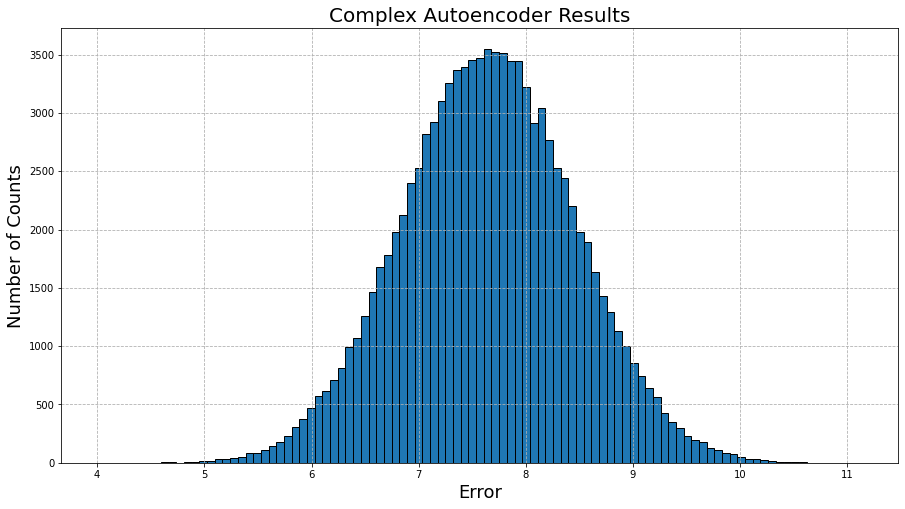

In [241]:
fig, ax = plt.subplots(figsize = (15,8))
bins = np.linspace(min(error2), max(error2), 100)
ax.hist(error2, bins = bins, align = 'mid', edgecolor = 'black')
ax.set_title('Complex Autoencoder Results', fontsize = 20)
ax.set_xlabel('Error', fontsize = 18)
ax.set_ylabel('Number of Counts', fontsize = 18)
ax.grid(linestyle = '--')
plt.show()

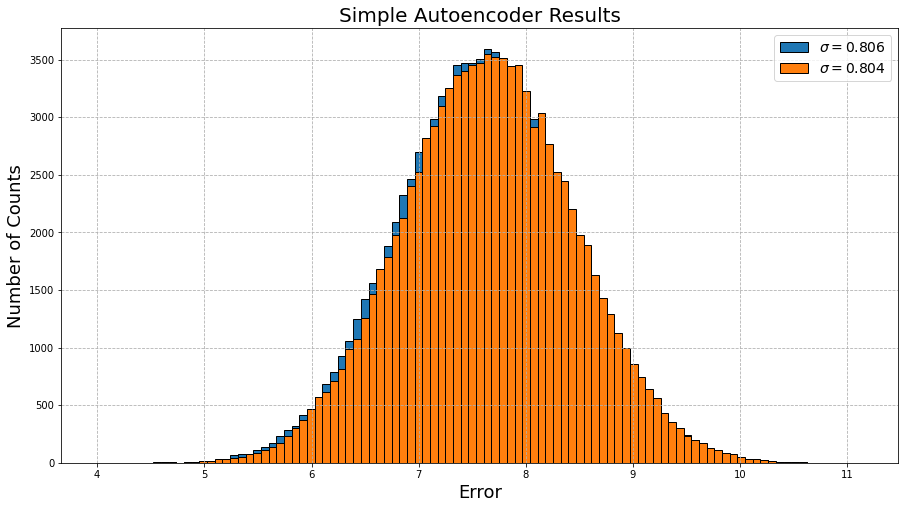

In [246]:
fig, ax = plt.subplots(figsize = (15,8))
bins = np.linspace(min(error2), max(error2), 100)
ax.hist(error, bins = bins, align = 'mid', edgecolor = 'black', label = r'$\sigma = %s$' % round(np.std(error), 3))
ax.hist(error2, bins = bins, align = 'mid', edgecolor = 'black', label = r'$\sigma = %s$' % round(np.std(error2), 3))
ax.set_title('Simple Autoencoder Results', fontsize = 20)
ax.set_xlabel('Error', fontsize = 18)
ax.set_ylabel('Number of Counts', fontsize = 18)
ax.grid(linestyle = '--')
ax.legend(fontsize = 14)
plt.show()

# Do the Number of Features Matter?

In [128]:
def simple_autoencoder(input_dim):
    
    data = np.random.rand(1000000, input_dim) # Generate 1,000,000 random data points with 50 features each
    train, test = train_test_split(data, test_size = 0.1, random_state = 42) # split training and testing data 


    hidden_layer_nodes = 2 # the number of nodes to use in the hidden layer

    ''' Create the Autoencoder '''
    input_layer = Input(shape=(input_dim,))
    encoder_layer = Dense(hidden_layer_nodes, activation='sigmoid')(input_layer)
    decoder_layer = Dense(input_dim, activation='sigmoid')(encoder_layer)
    autoencoder = Model(input_layer, decoder_layer)

    ''' Create the Encoder '''
    encoder = Model(input_layer, encoder_layer)

    ''' Create the Decoder '''
    encoded_input = Input(shape=(hidden_layer_nodes,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(encoded_input, decoder_layer(encoded_input))
    
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    autoencoder.fit(train,
                train,
                epochs=10, # run through the training data 10 times
                batch_size=100, # use batches of 100 before making changes
                shuffle=True, # shuffle the training data to prevent biasing
                validation_data=(test, test), # use our test data set as validation
                verbose = 0) # hide the output while training
    
    encoded_test = encoder.predict(test) # encode our features
    decoded_test = decoder.predict(encoded_test) # decode our encoded features
    
    error = np.sum(abs(test - decoded_test), axis = 1) # compute the absolute error across each feature 
    
    return error

In [129]:
errors = []
for i in tnrange(1,6):
    errors.append(simple_autoencoder(2**i))

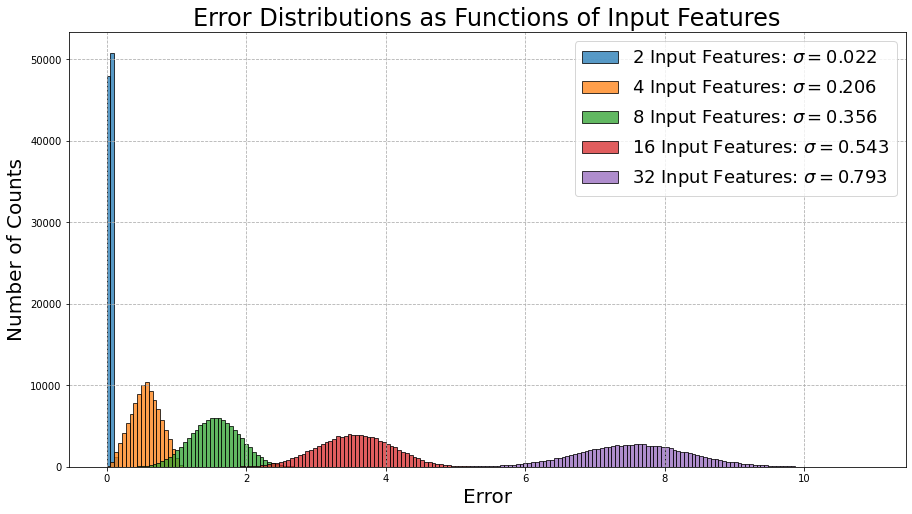

In [139]:
fig, ax = plt.subplots(figsize = (15,8))
bins = np.linspace(0, np.max(errors), 200)

for i, vals in enumerate(errors):
    ax.hist(vals, bins = bins, align = 'mid', edgecolor = 'black', alpha = 0.75, label = '%s Input Features: $\sigma = %s$' % (2**(i+1), round(np.std(vals), 3)))
    
ax.set_title('Error Distributions as Functions of Input Features', fontsize = 24)
ax.set_xlabel('Error', fontsize = 20)
ax.set_ylabel('Number of Counts', fontsize = 20)
ax.grid(linestyle = '--')
ax.legend(fontsize = 18)
plt.show()

# The MNIST Dataset

In [194]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = (x_train.astype('float32') / 255.).reshape(len(x_train), len(x_train[0])*len(x_train[0][0]))
x_test = (x_test.astype('float32') / 255.).reshape(len(x_test), len(x_test[0])*len(x_test[0][0]))

In [195]:
input_dim = len(x_train[0]) # input dimension is equal to the number of features
hidden_layer_nodes = 32 # the number of nodes to use in the hidden layer

''' Create the Autoencoder '''
input_layer = Input(shape=(input_dim,))
encoder_layer = Dense(hidden_layer_nodes, activation='relu')(input_layer)
decoder_layer = Dense(input_dim, activation='sigmoid')(encoder_layer)
autoencoder = Model(input_layer, decoder_layer)

''' Create the Encoder '''
encoder = Model(input_layer, encoder_layer)

''' Create the Decoder '''
encoded_input = Input(shape=(hidden_layer_nodes,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [196]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [197]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test), 
                verbose = 0)

In [198]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

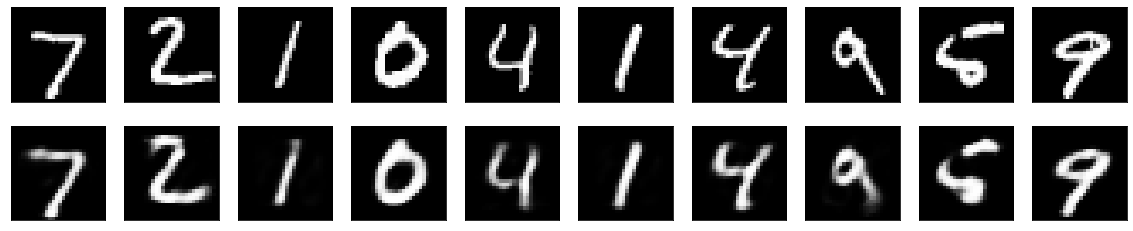

In [199]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [201]:
error = np.sum(abs(x_test - decoded_imgs), axis = 1) # compute the absolute error across each feature 

In [212]:
Dict = {} # create dictionary to map each index to its error value 
for i in range(len(error)): 
    Dict[i] = error[i]

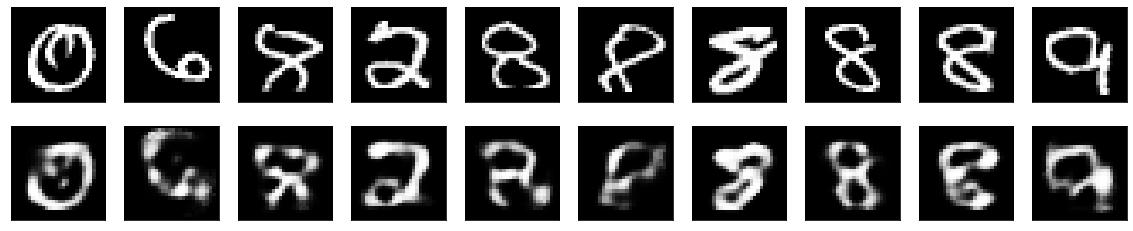

In [215]:
worst = list(dict(sorted(Dict.items(), key=lambda item: item[1], reverse = True))) # pick out the worst 10 reconstructions

plt.figure(figsize=(20, 4))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[worst[i]].reshape(28, 28)) # display the original
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs[worst[i]].reshape(28, 28)) # display reconstruction
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()    

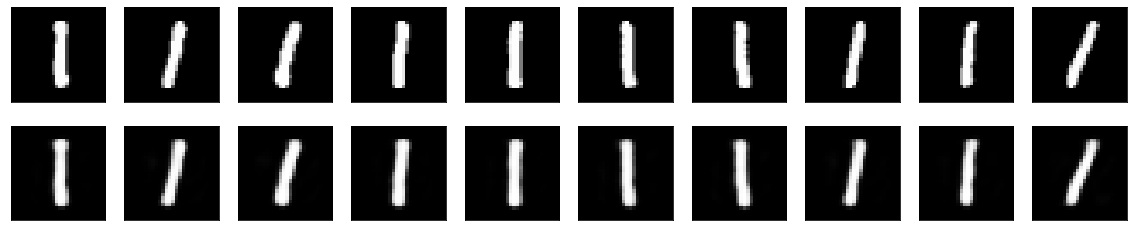

In [248]:
best = list(dict(sorted(Dict.items(), key=lambda item: item[1]))) # pick out the best 10 reconstructions

plt.figure(figsize=(20, 4))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[best[i]].reshape(28, 28)) # display the original
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs[best[i]].reshape(28, 28)) # display reconstruction
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()    

# Plot Used for Website Post

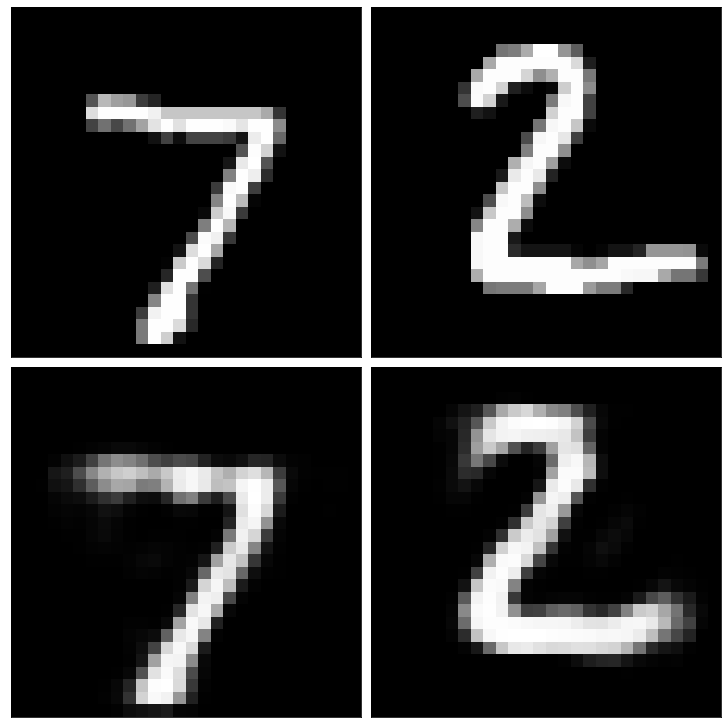

In [162]:
fig, ax = plt.subplots(2, 2, figsize = (10,10), constrained_layout = True)

ax[0][0].imshow(x_test[0].reshape(28,28))
ax[0][0].get_xaxis().set_visible(False)
ax[0][0].get_yaxis().set_visible(False)

ax[1][0].imshow(decoded_imgs[0].reshape(28,28))
ax[1][0].get_xaxis().set_visible(False)
ax[1][0].get_yaxis().set_visible(False)

ax[0][1].imshow(x_test[1].reshape(28,28))
ax[0][1].get_xaxis().set_visible(False)
ax[0][1].get_yaxis().set_visible(False)

ax[1][1].imshow(decoded_imgs[1].reshape(28,28))
ax[1][1].get_xaxis().set_visible(False)
ax[1][1].get_yaxis().set_visible(False)

plt.savefig("Autoencoder")